# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# đọc dữ liệu

## Dữ liệu sách

In [2]:
file_path = r'data\book_data.csv'

In [3]:
data_book = pd.read_csv(file_path)

In [4]:
data_book.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


# Xử lý dữ liệu

## Data_book

In [5]:
data_book_process = data_book.drop(columns= ['authors', 'manufacturer','original_price', 'quantity'])

### Kiểm tra kiểu dữ liệu

In [6]:
data_book_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1796 non-null   int64  
 1   title          1796 non-null   object 
 2   current_price  1796 non-null   int64  
 3   category       1796 non-null   object 
 4   n_review       1796 non-null   int64  
 5   avg_rating     1796 non-null   float64
 6   pages          1546 non-null   object 
 7   cover_link     1796 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 112.4+ KB


Note:  
Cần kiểm tra lại kiểu dữ liệu của pages  
Cột pages bị thiếu dữ liệu => Xử lý bằng cách thay  thế bằng giá trị mean

### Các giá trị thống kê đơn giản

In [7]:
data_book_process.describe().round(3)

,product_id,current_price,n_review,avg_rating
count,1.796000e+03,1796.000,1796.000,1796.000
mean,1.157510e+08,115021.948,341.213,4.584
std,7.263814e+07,101372.518,791.538,1.152
min,3.353370e+05,0.000,0.000,0.000
25%,5.262294e+07,60000.000,16.000,4.800
50%,1.136198e+08,88685.000,75.000,4.800
75%,1.925312e+08,136500.000,306.250,5.000
max,2.079098e+08,1200000.000,11481.000,5.000


### Xử lý dữ liệu trùng nhau

In [8]:
print("Số bản ghi sách trùng nhau:", data_book_process.duplicated().sum())

Số bản ghi sách trùng nhau: 19


In [9]:
data_book_process.drop_duplicates(keep= 'first', inplace= True)

In [10]:
data_book_process[data_book_process.duplicated(subset=["title"]) & (data_book_process.avg_rating == 0)]


,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
342,205227772,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,292500,Sách Địa Danh - Du Lịch,0,0.0,NaN,https://salt.tikicdn.com/ts/product/51/15/ce/b...
1181,205279963,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,258000,Du ký,0,0.0,778,https://salt.tikicdn.com/ts/product/cd/1d/ae/8...
1275,199709625,Ngược Dòng Tiền Kiếp,155000,Ngược Dòng Tiền Kiếp,0,0.0,NaN,https://salt.tikicdn.com/ts/product/1b/bb/b9/e...
1406,2253993,7 Chiến Lược Thịnh Vượng Và Hạnh Phúc (Tái Bản),72000,Sách kỹ năng làm việc,0,0.0,220,https://salt.tikicdn.com/ts/product/a9/68/94/0...
1463,196411147,Phượng Hoàng Tái Sinh - 12 Phẩm Chất Quan Trọn...,152000,Sách tư duy - Kỹ năng sống,0,0.0,NaN,https://salt.tikicdn.com/ts/product/03/2e/74/8...


In [11]:
data_book_process[data_book_process.title == "Tâm Lý Học Thành Công (Tái Bản)"]

,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
1077,157054862,Tâm Lý Học Thành Công (Tái Bản),130000,Sách giáo dục,62,4.8,480,https://salt.tikicdn.com/ts/product/26/ff/60/9...
1391,8011021,Tâm Lý Học Thành Công (Tái Bản),129350,Sách tư duy - Kỹ năng sống,85,5.0,480,https://salt.tikicdn.com/ts/product/41/c8/23/8...


In [12]:
data_book_process[data_book_process['title'].str.contains('Nước Ép Trị Liệu Và Chế Độ Ăn Theo Phương')]


,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
480,178483637,Nước Ép Trị Liệu Và Chế Độ Ăn Theo Phương Pháp...,139300,Nước Ép Trị Liệu Và Chế Độ Ăn Theo Phương Pháp...,219,5.0,340,https://salt.tikicdn.com/ts/product/ce/03/a6/0...
1533,182149648,Nước Ép Trị Liệu Và Chế Độ Ăn Theo Phương Pháp...,133900,Nước Ép Trị Liệu Và Chế Độ Ăn Theo Phương Pháp...,33,5.0,NaN,https://salt.tikicdn.com/ts/product/2e/16/ee/8...


In [13]:
data_book_process[data_book_process['title'].str.contains('Minh Triết Trong Ăn Uống Của Phương Đô')]

,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
835,13833466,Minh Triết Trong Ăn Uống Của Phương Đông (Tái ...,91000,Sách tư duy - Kỹ năng sống,405,4.7,128,https://salt.tikicdn.com/media/catalog/product...
1587,85923342,Minh Triết Trong Ăn Uống Của Phương Đông (Tái ...,91000,Sách tư duy - Kỹ năng sống,62,4.7,128,https://salt.tikicdn.com/media/catalog/product...


In [14]:
data_book_process.drop(index=[342, 1181,1275,1406,1463,1391,1533,1587], inplace= True)

### Xử lý dữ liệu bị thiếu

In [15]:
data_book_process.isna().sum()

product_id         0
title              0
current_price      0
category           0
n_review           0
avg_rating         0
pages            246
cover_link         0
dtype: int64

In [16]:
# Kiểm tra xem trong cột pages còn có kiểu dạng khác không
for data in data_book_process.pages:
    try: 
        if type(float(data)) == 'int':
            continue
    except:
        print(data)

Cuốn


Vậy trong cột pages có một kiểu kí tự khác đó là thay vì số trang mà nó được để dưới dạng là "Cuốn" => cần thay thế.

In [17]:
data_book_process[data_book_process.pages == "Cuốn"]

,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
1266,197639028,Động Từ Bất Quy Tắc Và Ngữ Pháp Tiếng Anh Căn Bản,12000,Sách Học Tiếng Anh,2,5.0,Cuốn,https://salt.tikicdn.com/ts/product/28/8e/9e/0...


In [18]:
data_book_process.pages.replace(to_replace= 'Cuốn' , value= 0, inplace= True)

In [19]:
data_book_process.pages = data_book_process.pages.astype(float)

In [20]:
data_book_process.pages.fillna(value= int(data_book_process.pages.mean()), inplace= True)

### Xử lý và phân loại sách

In [21]:
list_category = data_book_process.category.to_list()

In [22]:
data_book_process.category.value_counts()

Sách tư duy - Kỹ năng sống                 292
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       55
                                          ... 
Shaman King - Tập 19                         1
Blue Period - Tập 07                         1
Komi - Nữ Thần Sợ Giao Tiếp - Tập 14         1
Bên Rặng Tuyết Sơn (Tái Bản)                 1
Kaguya-Sama: Cuộc Chiến Tỏ Tình - Tập 3      1
Name: category, Length: 354, dtype: int64

In [23]:
keeping_values = list(pd.DataFrame(data_book_process.category.value_counts()[0:70]).T.columns)
keeping_values

['Sách tư duy - Kỹ năng sống',
 'Tiểu Thuyết',
 'Truyện ngắn - Tản văn - Tạp Văn',
 'Sách nghệ thuật sống đẹp',
 'Sách kỹ năng làm việc',
 'Bài học kinh doanh',
 'Truyện trinh thám',
 'Sách Học Tiếng Anh',
 'Sách Marketing - Bán hàng ',
 'Sách tài chính, tiền tệ',
 'Tác phẩm kinh điển',
 'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu',
 'Kiến thức - Bách khoa',
 'Sách Làm Cha Mẹ',
 'Lĩnh vực khác',
 'Truyện dài',
 'Kiến Thức Bách Khoa',
 'Văn học thiếu nhi',
 'Light novel',
 'Truyện kể cho bé',
 'Sách quản trị, lãnh đạo',
 'Truyện đam mỹ',
 'Tiểu sử - Hồi ký',
 'Lịch Sử Thế Giới',
 'Sách Chiêm Tinh - Horoscope',
 'Sách Học Tiếng Hoa',
 'Truyện tranh Ehon',
 'Sách kinh tế học',
 'Sách giáo dục',
 'Tô màu - Luyện chữ  ',
 'Thơ',
 'Sách khởi nghiệp',
 'Truyện tranh thiếu nhi',
 'Sách Nấu ăn',
 'Sách Luyện Thi Đại Học - Cao Đẳng',
 'Triết Học',
 'Sách Tâm Lý Tuổi Teen',
 'Lịch Sử Việt Nam',
 'Du ký',
 'Sách doanh nhân',
 'Truyện kinh dị',
 'Tranh Truyện',
 'Truyện ngôn tình',
 'Mỹ Thuật - Kiến T

In [24]:
def handle_category(category):
    if category not in keeping_values:
        return "Others"
    return category

data_book_process.category = data_book_process.category.apply(lambda category: handle_category(category))

### Kiểm tra xem dữ liệu còn các vấn đề logic gì không

In [25]:
data_book_process.describe()

,product_id,current_price,n_review,avg_rating,pages
count,1.769000e+03,1.769000e+03,1769.000000,1769.000000,1769.000000
mean,1.162810e+08,1.151275e+05,328.481628,4.596947,455.206897
std,7.249821e+07,1.018489e+05,730.615586,1.129230,4560.292274
min,3.353370e+05,0.000000e+00,0.000000,0.000000,0.000000
25%,5.278556e+07,6.000000e+04,16.000000,4.800000,220.000000
50%,1.149380e+08,8.880000e+04,75.000000,4.800000,332.000000
75%,1.927214e+08,1.365000e+05,303.000000,5.000000,455.000000
max,2.079098e+08,1.200000e+06,11481.000000,5.000000,192000.000000


Có thể thấy sách bị lỗi logic về số trang

<AxesSubplot:>

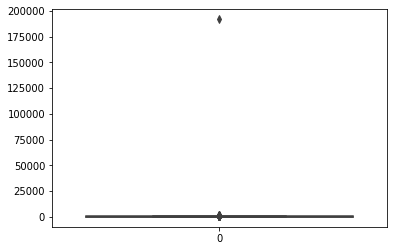

In [26]:
# Kiểm tra lỗi logic của trang sách. 
sn.boxplot(data= data_book_process.pages)

Có thể thấy tập dữ liệu này chỉ có một outlier khá lớn so với số dữ liệu còn lại. 

In [27]:
data_book_process[(data_book_process.pages > 2000) | (data_book_process.pages == 0)]

,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
650,201687274,Có Một Nổi Buồn Vừa Ngang Qua Đây,64900,Truyện ngắn - Tản văn - Tạp Văn,6,5.0,192000.0,https://salt.tikicdn.com/ts/product/08/fd/a5/0...
1096,26168610,Sherlock Holmes (Boxset Trọn Bộ 3 Tập),246000,Truyện trinh thám,795,4.7,2004.0,https://salt.tikicdn.com/ts/product/61/5e/d5/a...
1266,197639028,Động Từ Bất Quy Tắc Và Ngữ Pháp Tiếng Anh Căn Bản,12000,Sách Học Tiếng Anh,2,5.0,0.0,https://salt.tikicdn.com/ts/product/28/8e/9e/0...


In [28]:
# Chỉ có Có Một Nổi Buồn Vừa Ngang Qua Đây có số trang sai là 192
# Ngoài ra cũng chỉ có một cuốn  sách có số trang bằng 0 
data_book_process['pages'].replace(to_replace= [192000,0], value= [192,250], inplace= True)

In [29]:
data_book_process.describe()

,product_id,current_price,n_review,avg_rating,pages
count,1.769000e+03,1.769000e+03,1769.000000,1769.000000,1769.000000
mean,1.162810e+08,1.151275e+05,328.481628,4.596947,346.920859
std,7.249821e+07,1.018489e+05,730.615586,1.129230,180.420234
min,3.353370e+05,0.000000e+00,0.000000,0.000000,10.000000
25%,5.278556e+07,6.000000e+04,16.000000,4.800000,220.000000
50%,1.149380e+08,8.880000e+04,75.000000,4.800000,332.000000
75%,1.927214e+08,1.365000e+05,303.000000,5.000000,455.000000
max,2.079098e+08,1.200000e+06,11481.000000,5.000000,2004.000000


In [30]:
file_path_1 = r'data\book_data.csv'

In [31]:
new_rating = pd.read_csv(file_path_1)
new_rating.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


In [32]:
merged_df = pd.merge(data_book_process, new_rating[['product_id', 'avg_rating']], on='product_id', how='left')

merged_df['avg_rating_x'] = merged_df['avg_rating_y'].fillna(merged_df['avg_rating_x'])

merged_df.drop(columns=['avg_rating_y'], inplace=True)
merged_df.rename(columns={'avg_rating_x': 'avg_rating'}, inplace=True)

In [33]:
merged_df

,product_id,title,current_price,category,n_review,avg_rating,pages,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,64800,Tiểu Thuyết,11481,5.0,244.0,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,64800,Tiểu Thuyết,11481,5.0,244.0,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,59900,Sách tư duy - Kỹ năng sống,780,4.8,184.0,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,126000,Lĩnh vực khác,3623,4.8,430.0,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,73787185,Những Tù Nhân Của Địa Lý,126000,Lĩnh vực khác,3623,4.8,430.0,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
...,...,...,...,...,...,...,...,...
1783,192949122,7 Thói Quen Hiệu Quả - The 7 Habits Of Highly ...,191200,Sách tư duy - Kỹ năng sống,7,5.0,455.0,https://salt.tikicdn.com/ts/product/ba/c3/c0/1...
1784,157579054,Các Vấn Đề Của Triết Học (The Problems Of Phil...,48900,Triết Học,20,5.0,236.0,https://salt.tikicdn.com/ts/product/a5/52/7f/3...
1785,20704715,Để Con Được Chích - Hiểu Hết Về Vắc Xin Và Miễ...,43200,Sách Làm Cha Mẹ,47,4.6,296.0,https://salt.tikicdn.com/ts/product/05/15/e0/1...
1786,131144753,Nhà Lãnh Đạo 360 Độ (Tái Bản),107500,"Sách quản trị, lãnh đạo",33,5.0,436.0,https://salt.tikicdn.com/ts/product/fd/bd/40/8...


In [34]:
merged_df.drop_duplicates(keep= 'first', inplace= True)

In [35]:
merged_df.to_csv("data_clearn.csv", index= False, encoding= 'utf-8')